Loading the Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df = pd.read_csv('financial_data.csv')


In [79]:
print(df)

     COMPANY  YEAR TOTAL REVENUE NET INCOME TOTAL ASSETS TOTAL LIABILITIES  \
0  Microsoft  2021       168,088     61,271      333,779           191,791   
1  Microsoft  2022       198,270     72,738      364,840           198,298   
2  Microsoft  2023       211,915     72,361      411,976           205,753   
3      Tesla  2021        53,823      5,644       62,131            30,548   
4      Tesla  2022        81,462     12,587       82,338            36,440   
5      Tesla  2023        96,773     14,974      106,618            43,009   
6      Apple  2021       365,817     94,680      351,002           287,912   
7      Apple  2022       394,328     99,803      352,755           302,083   
8      Apple  2023       383,285     96,995      352,583           290,437   

  CASH FLOW FROM OPS  
0             76,740  
1             89,035  
2             87,582  
3             11,497  
4             14,724  
5             13,256  
6            104,038  
7            122,151  
8           

Calculating the growth metrics

In [107]:
# Remove commas and convert TOTAL REVENUE to numeric
df["TOTAL REVENUE"] = df["TOTAL REVENUE"].astype(str).str.replace(",", "").astype(float)

# Calculate revenue growth percentage
df["Revenue Growth (%)"] = df.groupby("COMPANY")["TOTAL REVENUE"].pct_change() * 100

# Replace NaN in first year with 0%
df["Revenue Growth (%)"] = df["Revenue Growth (%)"].fillna(0)

# Display results
print(df[["COMPANY", "YEAR", "TOTAL REVENUE", "Revenue Growth (%)"]])


     COMPANY  YEAR  TOTAL REVENUE  Revenue Growth (%)
6      Apple  2021       365817.0            0.000000
7      Apple  2022       394328.0            7.793788
8      Apple  2023       383285.0           -2.800461
0  Microsoft  2021       168088.0            0.000000
1  Microsoft  2022       198270.0           17.956071
2  Microsoft  2023       211915.0            6.882030
3      Tesla  2021        53823.0            0.000000
4      Tesla  2022        81462.0           51.351653
5      Tesla  2023        96773.0           18.795267


In [105]:
# Remove commas and convert 'TOTAL REVENUE' and 'NET INCOME' to numeric

df["NET INCOME"] = df["NET INCOME"].astype(str).str.replace(",", "").astype(float)

# Calculate Net Income Growth Percentage
df["Net Income Growth (%)"] = df.groupby("COMPANY")["NET INCOME"].pct_change() * 100

# Replace NaN in first year with 0%
df["Net Income Growth (%)"] = df["Net Income Growth (%)"].fillna(0)

# Display results
print(df[["COMPANY", "YEAR", "NET INCOME", "Net Income Growth (%)"]])



     COMPANY  YEAR  NET INCOME  Net Income Growth (%)
6      Apple  2021     94680.0               0.000000
7      Apple  2022     99803.0               5.410858
8      Apple  2023     96995.0              -2.813543
0  Microsoft  2021     61271.0               0.000000
1  Microsoft  2022     72738.0              18.715216
2  Microsoft  2023     72361.0              -0.518299
3      Tesla  2021      5644.0               0.000000
4      Tesla  2022     12587.0             123.015592
5      Tesla  2023     14974.0              18.964010


Aggeregating Statistics

In [113]:
# Convert columns to numeric, removing commas
numeric_columns = ["TOTAL REVENUE", "NET INCOME", "CASH FLOW FROM OPS"]
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

# Grouping by company and computing aggregate metrics
summary_stats = df.groupby("COMPANY").agg({
    "TOTAL REVENUE": ["mean", "sum", "max", "min", "std"],
    "NET INCOME": ["mean", "sum", "max", "min", "std"],
    "CASH FLOW FROM OPS": ["mean", "sum"]
}).reset_index()

# Rename columns for better readability
summary_stats.columns = ["Company", "Avg Revenue", "Total Revenue", "Max Revenue", "Min Revenue", "Revenue Std Dev",
                         "Avg Net Income", "Total Net Income", "Max Net Income", "Min Net Income", "Net Income Std Dev",
                         "Avg Cash Flow", "Total Cash Flow"]

# Display the summary statistics
print(summary_stats)


     Company    Avg Revenue  Total Revenue  Max Revenue  Min Revenue  \
0      Apple  381143.333333      1143430.0     394328.0     365817.0   
1  Microsoft  192757.666667       578273.0     211915.0     168088.0   
2      Tesla   77352.666667       232058.0      96773.0      53823.0   

   Revenue Std Dev  Avg Net Income  Total Net Income  Max Net Income  \
0     14375.650675    97159.333333          291478.0         99803.0   
1     22427.457420    68790.000000          206370.0         72738.0   
2     21767.879785    11068.333333           33205.0         14974.0   

   Min Net Income  Net Income Std Dev  Avg Cash Flow  Total Cash Flow  
0         94680.0         2565.450513  112244.000000         336732.0  
1         61271.0         6514.372802   84452.333333         253357.0  
2          5644.0         4846.853240   13159.000000          39477.0  


Industry level yearly trends

In [115]:
yearly_trends = df.groupby("YEAR").agg({
    "TOTAL REVENUE": "sum",
    "NET INCOME": "sum",
    "CASH FLOW FROM OPS": "sum"
}).reset_index()

print(yearly_trends)


   YEAR  TOTAL REVENUE  NET INCOME  CASH FLOW FROM OPS
0  2021       587728.0    161595.0            192275.0
1  2022       674060.0    185128.0            225910.0
2  2023       691973.0    184330.0            211381.0


Visualizing the trends - Revenue Trends Over Years(by company)

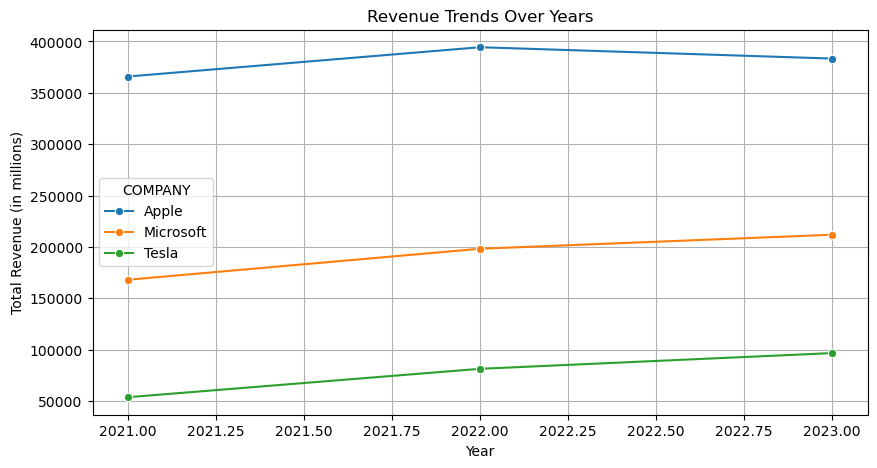

In [117]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="YEAR", y="TOTAL REVENUE", hue="COMPANY", marker="o")
plt.title("Revenue Trends Over Years")
plt.ylabel("Total Revenue (in millions)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Net Income Trends over time

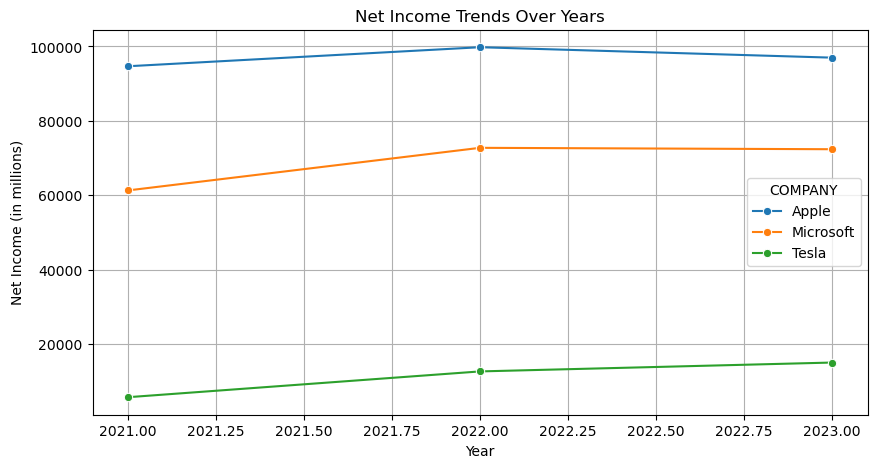

In [123]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="YEAR", y="NET INCOME", hue="COMPANY", marker="o")
plt.title("Net Income Trends Over Years")
plt.ylabel("Net Income (in millions)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

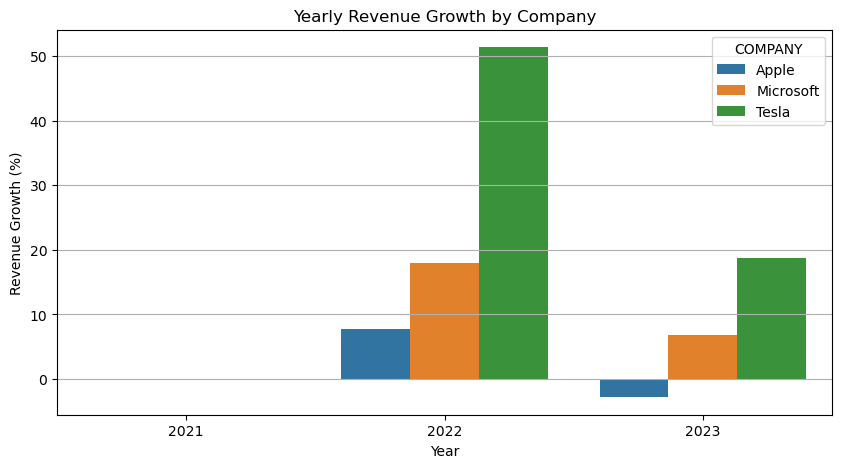

In [125]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="YEAR", y="Revenue Growth (%)", hue="COMPANY")
plt.title("Yearly Revenue Growth by Company")
plt.ylabel("Revenue Growth (%)")
plt.xlabel("Year")
plt.grid(axis="y")
plt.show()


Net Income growth rate

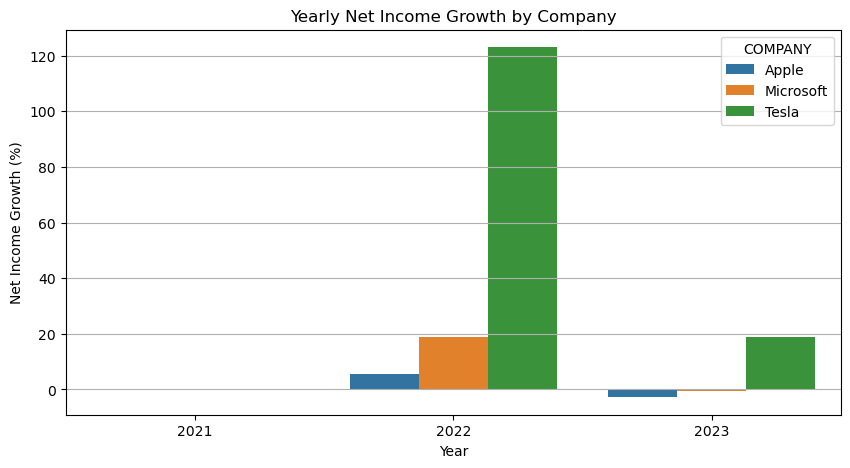

In [127]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="YEAR", y="Net Income Growth (%)", hue="COMPANY")
plt.title("Yearly Net Income Growth by Company")
plt.ylabel("Net Income Growth (%)")
plt.xlabel("Year")
plt.grid(axis="y")
plt.show()

SUMMARY

Revenue Growth Trends:Tesla had the highest revenue growth (~51% in 2022), while Apple's revenue slightly declined in 2023.
Net Income Insights: Apple consistently maintains the highest net income, while Tesla shows the most rapid growth.Industry Trends: The total industry revenue has been increasing, with some fluctuations in net income.
Conclusion: While Apple leads in absolute revenue and net income, Tesla is demonstrating the highest financial growth, indicating strong expansion.